# Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Docs
https://numpy.org/doc/stable/reference/routines.html

Numpy is the defacto numerical library for python.

First things first, if you are using numpy like this:

In [3]:
def bad_way(a, b):
    x = np.zeros(len(a))
    
    for i in range(len(a)):
        x[i] = 1.324 * a[i] - 12.99 * b[i] + 1
    
    return x

### This is **BAD**, it does not take advantage of numpys greatest advantage. **Vectorization**

In [4]:
def numpy_way(a, b):
    return 1.324 * a - 12.99 * b + 1

In [5]:
a = np.arange(1e6)
b = np.arange(1e6)

We can see they are the same:

In [6]:
np.all(numpy_way(a,b) == bad_way(a,b))

True

### But one is much faster:

In [7]:
%timeit bad_way(a, b)

603 ms ± 7.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit numpy_way(a, b)

1.98 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A preview into optimizations:

In [9]:
a = np.random.rand(100,10,10,10,10)
b = np.random.rand(10,10,10,10,100)

In [10]:
%timeit a[0,:,:,:,:] + 1

5.34 µs ± 78.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit a[:,:,:,:,0] + 1

358 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We will discuss this tomorrow!

# Creating arrays

### Python list

In [19]:
a = np.array([10,20,30,40,50,60], dtype=np.float64)
a

array([10., 20., 30., 40., 50., 60.])

### Array properties

In [20]:
print(a.shape)
print(a.ndim)
print(a.nbytes)
print(a.dtype)

(6,)
1
48
float64


### Zeros

In [23]:
a = np.zeros(10)
b = np.zeros(shape= (20, 10) )

print(a)
print('-----')
print(b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-----
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Ones

In [24]:
a = np.ones(10)
b = np.ones(shape=(5,2))

a,b

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]))

## Empty

In [26]:
a = np.empty(10)
b = np.empty(shape=(5,2))

a,b

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]))

In [29]:
c = np.zeros_like(b)
np.ones_like(c)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

### Random Data

In [35]:
x = np.random.randn(10,10)
x

array([[ 1.55659656, -1.53487078, -0.57679336,  0.33254597,  0.43348467,
        -0.53581196, -0.02917589,  0.94046601, -0.0797415 ,  1.87123347],
       [ 1.85120369, -0.92968775,  0.00779124,  0.62057114, -0.63871643,
         0.60230307,  0.86672812, -0.21781078, -0.61875363, -0.8458336 ],
       [-1.43474222,  0.13676947,  0.42937629, -0.28887932, -0.42136645,
        -0.29123207,  0.2664935 ,  0.01025314, -1.91737742, -1.21897965],
       [ 0.71828117,  1.05486584, -0.02094906, -1.0835768 ,  1.13782024,
        -2.20753272,  1.29893981,  0.43774582, -0.37110174,  1.97059984],
       [-0.80783978, -1.0368437 , -1.77259186, -2.34311933,  0.67645674,
         0.58761825,  2.07196651,  0.12318253, -0.80305238, -0.07762025],
       [ 0.19172491,  0.94310291,  0.56931613, -0.4252888 , -1.85898772,
         0.09911926,  0.04455742,  1.62827745,  1.47886817, -0.98980448],
       [ 0.51015317,  0.74673092, -2.03808947,  0.75489499,  0.00567167,
        -0.26756178,  0.5594647 , -0.37628112

### Create array between start and end with a sampling value

In [41]:
a = np.arange(0, 10) # start, end, sampling
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Create array between start and end with a number of points

In [42]:
a = np.linspace(0,10, 4) # start, end, number of points. 10 inclusive
a

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [43]:
b = np.linspace(0, 10, 4, endpoint=False) # exclusive of 10
b

array([0. , 2.5, 5. , 7.5])

In [48]:
c = np.logspace(-4, 4, 10)
c

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

### Create a ND mesh using 1D arrays

In [ ]:
x = np.linspace(-10, 10, 20)
y = np.linspace(-20, 20, 50)

X, Y = np.meshgrid(x,y)

print(X.shape)
print(Y.shape)




(50, 50)
(50, 50)


array([[-0.36892414, -0.74666246, -1.15172057, ..., -0.67416994,
        -1.07922804, -1.45696636],
       [ 0.08892693, -0.28881138, -0.69386949, ..., -0.21631886,
        -0.62137697, -0.99911529],
       [ 0.74806615,  0.37032783, -0.03473028, ...,  0.44282036,
         0.03776225, -0.33997607],
       ...,
       [ 0.33997607, -0.03776225, -0.44282036, ...,  0.03473028,
        -0.37032783, -0.74806615],
       [ 0.99911529,  0.62137697,  0.21631886, ...,  0.69386949,
         0.28881138, -0.08892693],
       [ 1.45696636,  1.07922804,  0.67416994, ...,  1.15172057,
         0.74666246,  0.36892414]])

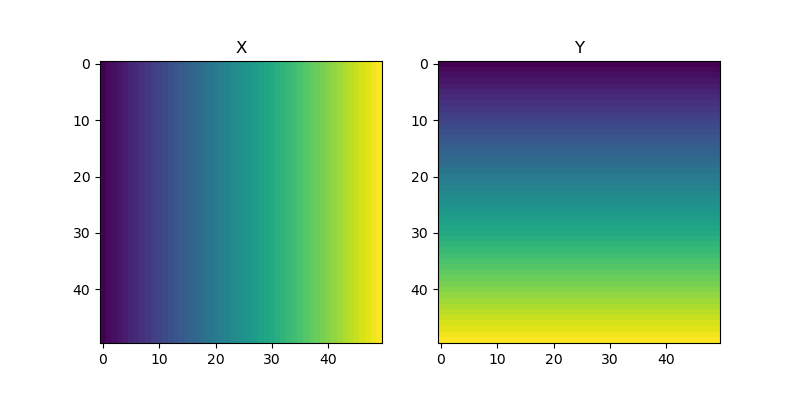

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.set_title('X')
ax1.imshow(X)
ax2.set_title('Y')
ax2.imshow(Y)
plt.show()

# 

### Access tricks

Numpy has standard access with 0, 1, 2 but you can also access it **backwards** by using negative indices. For example `-1` will access the last element, `-2` the one before last etc.

In [53]:
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
x[0]

0

In [55]:
x[1]

1

In [56]:
x[-1]

9

In [57]:
x[-2]

8

In [59]:
x[-10]

0

## Slicing

### Slicing is one of numpys best features, you can manipulate arrays in interesting ways. 

Slicing is achieved using the `::` operator where the arguments are:
    
    [start index]:[end index]:skip
    
You can supply all, some, or none of the arguments

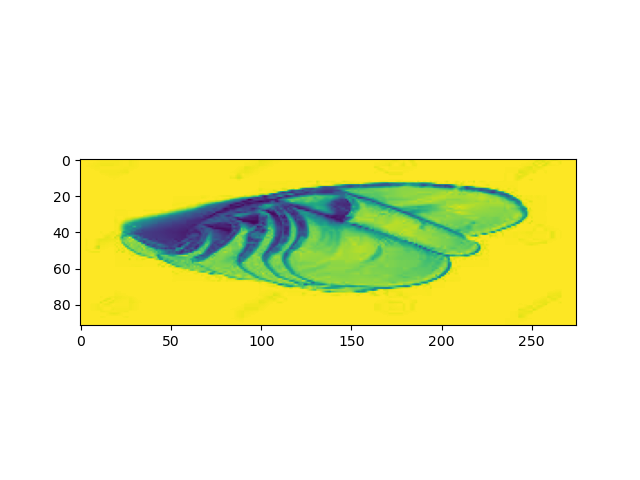

In [66]:
# Load in some important data
data = np.loadtxt('../../data/important.txt')
plt.figure()
plt.imshow(data[::-2,::-1])
plt.show()

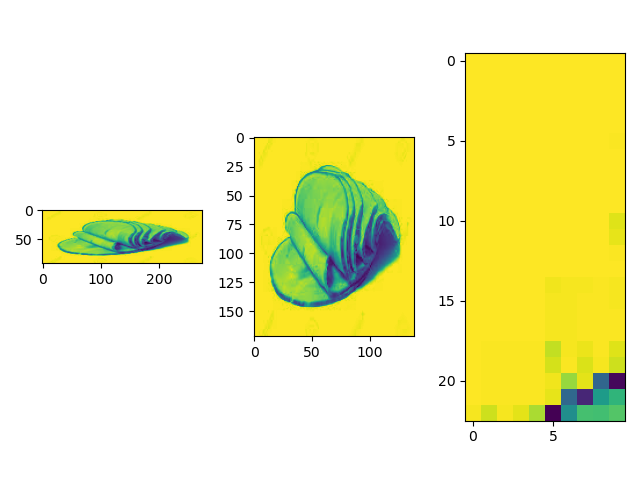

In [67]:
figs, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(data[::2])
ax2.imshow(data[10:-1,::2])
ax3.imshow(data[4:50:2, 70:90:2])
figs.tight_layout()
plt.show()

### If we wanted a slice but only cared about the last axes we might end up doing this:

In [69]:
def bad_many_slices_of_ham(array):
    if array.ndim == 2:
        return array[::2,::2]
    elif array.ndim == 3:
        return array[:, ::2, ::2]
    elif array.ndim == 4:
        return array[:, :, ::2, ::2]
    raise NotImplementedError
    

In [72]:
bad_many_slices_of_ham(data.reshape(1,*data.shape))

array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 254., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]])

In [73]:
bad_many_slices_of_ham(data.reshape(1, 1,*data.shape))

array([[[[255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         ...,
         [255., 255., 255., ..., 254., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.]]]])

In [74]:
bad_many_slices_of_ham(data.reshape(1,1, 1,*data.shape))

NotImplementedError: 

### What we can do instead is exploit the ellipsis operator (...):

In [75]:
def good_many_slices_of_ham(array):
    return array[..., ::2, ::2]

In [76]:
good_many_slices_of_ham(data)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 254., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [77]:
good_many_slices_of_ham(data.reshape(1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,*data.shape))

array([[[[[[[[[[[[[[[[[[[[255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         ...,
                         [255., 255., 255., ..., 254.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.]]]]]]]]]]]]]]]]]]]])

In [78]:
big_shape = data.reshape(1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,*data.shape)

In [81]:
big_shape[::2, :, :, :, ..., ::4 ].shape

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 183, 69)

## Indexing and getting fancy filtering

In [83]:
array = np.arange(0,400,4)
array

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256,
       260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308,
       312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360,
       364, 368, 372, 376, 380, 384, 388, 392, 396])

In [84]:
array[[0, 50, 70]]

array([  0, 200, 280])

In [89]:
v = np.arange(0,30,10, dtype=np.float64)
v.astype(np.int64)

array([ 0, 10, 20])

In [91]:
array[
    np.arange(0,30,10, dtype=np.float64).astype(np.int64)
]

array([ 0, 40, 80])

### Filtering using boolean masks

If you perform a comparison of some kind (`==`, `<`, `>` etc). Numpy will generate a boolean array

In [92]:
array < 50

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [121]:
np.where(array < 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),)

In [123]:
mybool = np.array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, True, False, False, False, False,
       False], dtype=bool)

In [125]:
array[np.where(mybool)]

array([  0,   0,   0,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
       376])

In [105]:
mybool.dtype

dtype('bool')

In [106]:
array[mybool]

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [108]:
array[ array < 10 ] = 0
array

array([  0,   0,   0,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256,
       260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308,
       312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360,
       364, 368, 372, 376, 380, 384, 388, 392, 396])

### Exercise circular aperture

Given `x` and `y` coordinates and a `radius` create a `create_circle` function that produces an array of zeros with a circle of 1s
For example a function that works like this:
    
    >>> x = np.linspace(-10, 10, 5)
    >>> y = np.linspace(-10, 10, 5)
    >>> R = 5
    >>> circle = create_circle(x, y, 5)

Would return an `circle` array like this:
    
    [0 0 0 0 0]
    [0 0 1 0 0]
    [0 1 1 1 0]
    [0 0 1 0 0]
    [0 0 0 0 0]
    
Remember:
$$ 
R = \sqrt{x^2 + y^2} 
$$



In [114]:
def create_circle(x, y, radius):
    pass
    

In [115]:
x = np.linspace(-10, 10, 5)
y = np.linspace(-10, 10, 5)

In [116]:
create_circle(x, y, 5)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

Now make an interact plot of it with an adjustable radius (You can refer to yesterdays notebook on this!)
You can use `plt` interface or if you're feeling fancy try `fig, ax` interface

interactive(children=(FloatSlider(value=5.0, description='R', max=10.0), Output()), _dom_classes=('widget-inte…

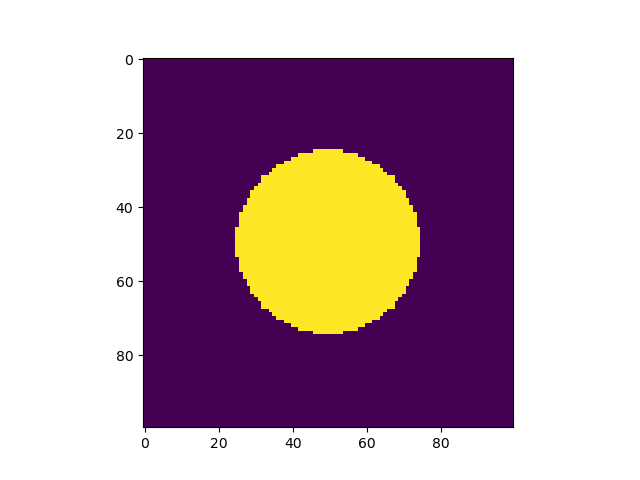

### AND (&)

In [131]:
print(True & True)
print(True & False)
print(False & False)

array[ (array <50) & (array > 20)]


True
False
False


array([24, 28, 32, 36, 40, 44, 48])

### OR (|)

In [132]:
print(True | True)
print(True | False)
print(False | False)

array[ (array <50) | (array > 350) ]

True
True
False


array([  0,   0,   0,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
       352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396])

### Exclusive OR (^)

In [134]:
print(True ^ True)
print(True ^ False)
print(False ^ False)

array[  (array < 50) ^ (array < 70)]

False
True
False


array([52, 56, 60, 64, 68])

### NOT (~)

In [135]:
print(not True)
print(not False)

False
True


In numpy not is represented by the (~) operator and is used like this:

In [136]:
array[~(array >= 50)]

array([ 0,  0,  0, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

### Exercise build a square aperture

Like the circle aperture, using filtering given, `x`, `y`, `width` and `height` produce rectanglar aperture:

    >>> x = np.linspace(-10, 10, 5)
    >>> y = np.linspace(-10, 10, 5)
    >>> width = 5
    >>> height = 10
    >>> rect = create_rectangle(x, y, width, height)

Would return an `rectangle` array like this:
    
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]


Hint: You can use `np.abs` to take the absolute value

In [194]:
def create_rectangle(x, y, width, height):
    pass
    
    

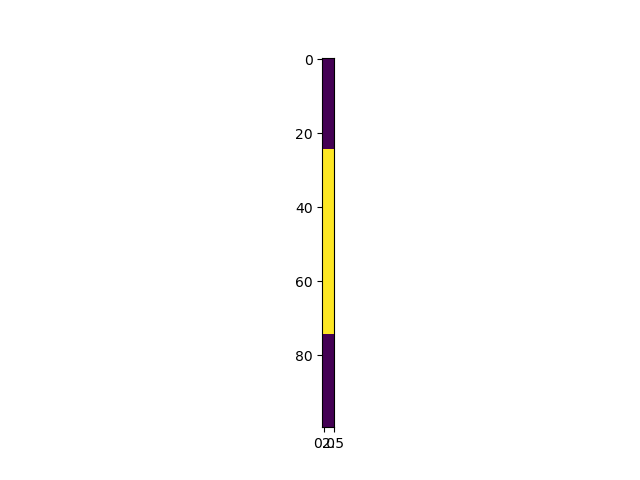

In [195]:
plt.figure()
plt.imshow(create_rectangle(x, y, 5, 5))
plt.show()

interactive(children=(FloatSlider(value=5.0, description='w', max=10.0), FloatSlider(value=5.0, description='h…

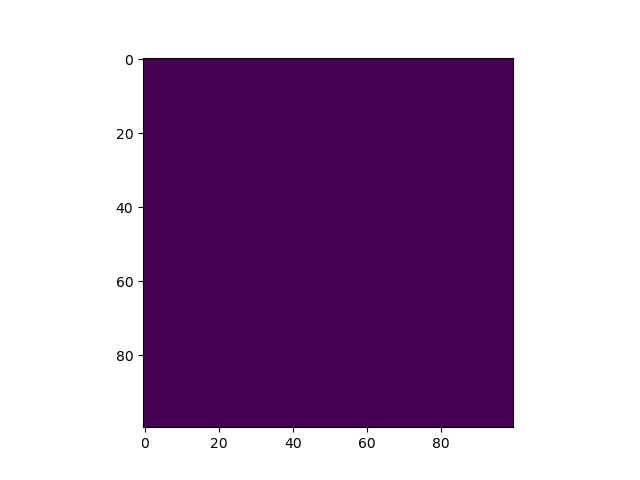

In [151]:
from ipywidgets.widgets import interact

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# ...Do the plotting here
fig, ax = plt.subplots()

im = ax.imshow(create_rectangle(x,y,5, 10))

@interact(w=(0, 10,0.1), h=(0, 10, 0.1))
def update(w=5, h=5):
    new_rect = create_rectangle(x, y, w, h)
    im.set_data(new_rect)

## Broadcasting

Lets look at a common problem. We have a matrix `A` and a vector `x` and we want to apply `x` along the matrix. For example:
    
    A:
      [1,1,1,1]
      [1,1,1,1]
      [1,1,1,1]
    x:
      [1, 2, 3]
    
    result:
      [1,1,1,1]
      [2,2,2,2]
      [3,3,3,3]
How would we go about doing it?

In [154]:
A = np.ones(shape=(3,4))
x = np.arange(1,4)
A,x

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([1, 2, 3]))

In [156]:
A*x

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

We can insert a fake axis into `x` to make its shape "compatible" with `A`

In [157]:
A*x[:, None]

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

array([[1],
       [2],
       [3]])

Broadcasting allows you make arrays dimensionally compatible by inserting "fake" axis. Numpy determines compatible dimensions through two rules:

- they are equal, or
- one of them is 1

We can exploit this behavoir and build higher dimensional array operations using lower dimensional ones. For example, with just `x` and simulate an outer product

$\rvert x\rangle \langle x \rvert$

In [165]:
x[:,None]*x[None,:]

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [167]:
x[:,None] - x[None,:]

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])

### Exercise Weins Law version II

Previously our Weins law function looked like this:

In [168]:
def weins_law(wavelength, 
              temperature):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    return I0 * np.exp(-( h * c ) / ( wavelength * kB * temperature))

Now if we tried to pass in a temperature array and wavelength array what should the shape be?

In [169]:
temperature = np.linspace(10,1000,100)
wavelength = np.linspace(0.1,100,100)

out = weins_law(wavelength, temperature)

In [170]:
out.shape

(100,)

Is this correct? What about if they're different shapes?


In [171]:
temperature = np.linspace(10,1000,10)
wavelength = np.linspace(0.1,100,100)
out = weins_law(wavelength, temperature)

ValueError: operands could not be broadcast together with shapes (100,) (10,) 

It doesn't, since for Weins law we expect:

- For *each* temperature we want all wavelengths
- The shape of the output array should be something like (Num T, Num wavelength)

Use broadcasting and fix our weins law function:

In [174]:
def weins_law_II(wavelength, 
              temperature):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength[None, :] ** 5  # (1, w)
                                                                 # (t, 1)
    return I0 * np.exp(-( h * c ) / ( wavelength[None, :] * kB * temperature[:,None])) 

# (t, w)


temperature = np.linspace(10,1000,100)
wavelength = np.linspace(0.1,100,100)

out = weins_law_II(wavelength, temperature)

assert out.shape == (100,100)

temperature = np.linspace(10,1000,10)
wavelength = np.linspace(0.1,100,100)

out = weins_law_II(wavelength, temperature)

assert out.shape == (10,100)

In [186]:
broad_out = out[:,None,:,None,None]
broad_out.shape

(10, 1, 100, 1, 1)

In [188]:
broad_out.reshape(*out.shape).shape

(10, 100)

In [184]:
out.ravel().shape

(1000,)

## Linear Algebra

In [196]:
A = np.arange(0, 100).reshape(10, 10)
v1 = np.arange(0, 10)

In [200]:
v1.shape

(10,)

### Matrix matrix

In [201]:
np.dot(A,A)

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

In [202]:
A @ A

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

### Matrix Vector

In [203]:
np.dot(A, v1)

array([ 285,  735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335])

In [204]:
A @ v1

array([ 285,  735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335])

### Dot product

In [205]:
np.dot(v1, v1)

285

In [206]:
v1 @ v1

285

In [211]:
np.einsum('ij,jk -> i', A, A)

array([ 30525,  80025, 129525, 179025, 228525, 278025, 327525, 377025,
       426525, 476025])

### Transpose

In [218]:
np.random.rand(2,10).T.shape

(10, 2)

### Complex

In [222]:
A_complex = A*1j
A_complex.dtype

dtype('complex128')

In [223]:
v2 = np.array([5 + 1j, 4 + 4j])
print(v2.dtype)
v2

complex128


array([5.+1.j, 4.+4.j])

In [224]:
v2.conjugate()

array([5.-1.j, 4.-4.j])

In [225]:
v2*v2.conjugate()

array([26.+0.j, 32.+0.j])

In [227]:
v2.imag

array([1., 4.])

In [228]:
print(v2.real)
v2.real[:] *= 2
print(v2.imag)
v2.imag[:] /= 2

v2


[5. 4.]
[1. 4.]


array([10.+0.5j,  8.+2.j ])

In [232]:
np.abs(v1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [231]:
np.sqrt(v2.real**2 + v2.imag**2)

array([10.0124922 ,  8.24621125])

### Matrix inverse

In [233]:

A = np.random.rand(10,10)

np.linalg.inv(A)

array([[ 0.61359618, -0.11104012,  1.01251985, -0.83606503, -0.12327681,
        -0.16031422,  0.83389215, -0.03217279,  0.36791215, -0.66300379],
       [ 0.70074924, -0.32515446,  1.67328718,  1.67316484,  0.53432465,
        -2.0354434 ,  2.17415814, -3.9155018 ,  0.86666559, -1.04597467],
       [ 1.0755325 ,  0.52516655,  0.01045149, -0.24151835, -0.29779199,
        -0.10563635, -0.30233983,  0.75746825, -1.05218574, -0.202658  ],
       [ 0.97256945,  0.24462767,  1.06521454, -1.44656326, -2.01266361,
         0.0954141 , -0.4631833 ,  3.21063314, -1.31472075, -0.14406199],
       [-0.20031331, -0.23277656,  0.1164244 , -0.23743541, -0.30430279,
         0.35125811, -1.3599543 ,  1.85313628,  0.24926839, -0.47725788],
       [-1.15408501,  1.02163937, -0.25684826,  0.95131646,  0.07950509,
         0.28428661, -0.89523558, -0.26762486, -0.79715605,  0.03382123],
       [-0.34547728,  0.14771513, -1.34741649, -0.38226823,  0.37770736,
         0.90811213, -0.52115124, -0.21822754

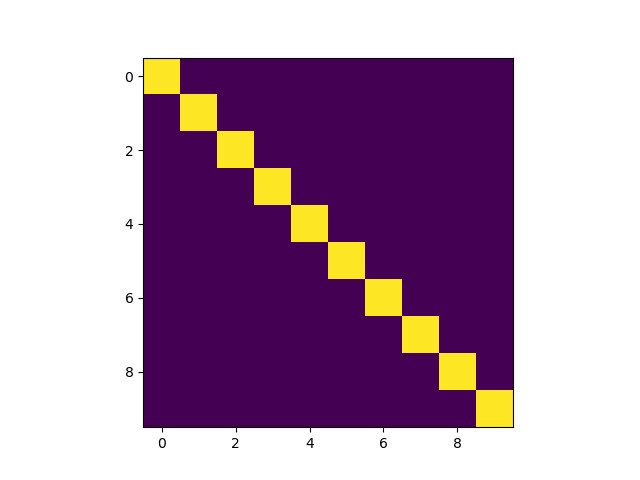

In [235]:
plt.figure()
plt.imshow(A @ np.linalg.inv(A))
plt.show()

### Matrix determinant

In [236]:
np.linalg.det(A)

0.028952350216486934

### Matrix eignvalues

In [237]:
eignval, eignvec = np.linalg.eig(A)

In [247]:
np.isclose(A @ eignvec, eignval*eignvec)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

array([[-1.13110841e+00+0.j        ,  5.34473303e-02+0.j        ,
         8.06663423e-02-0.08708532j,  8.06663423e-02+0.08708532j,
        -3.20867411e-03-0.01271195j, -3.20867411e-03+0.01271195j,
        -5.08657616e-01+0.j        ,  4.05306734e-02-0.01603817j,
         4.05306734e-02+0.01603817j,  1.32966864e-02-0.j        ],
       [-1.55943865e+00+0.j        ,  3.52914492e-01+0.j        ,
         1.75484867e-01-0.11419279j,  1.75484867e-01+0.11419279j,
         2.42272753e-01-0.15928696j,  2.42272753e-01+0.15928696j,
        -3.44096897e-03+0.j        , -1.46892343e-01+0.21142729j,
        -1.46892343e-01-0.21142729j, -2.04258326e-01+0.j        ],
       [-1.87906053e+00+0.j        ,  9.63292912e-02+0.j        ,
         2.18355019e-01-0.0232185j ,  2.18355019e-01+0.0232185j ,
         1.19252035e-01+0.07400125j,  1.19252035e-01-0.07400125j,
         3.64621413e-01-0.j        ,  6.26157226e-02-0.02844902j,
         6.26157226e-02+0.02844902j,  3.38746868e-02-0.j        ],
       

## Operations

### Reductions

In [248]:
np.sum(A)
A.sum()

51.058720424065726

In [250]:
A.shape

(10, 10)

In [249]:
A.sum(axis=0)

array([5.12371906, 5.0939221 , 5.30002181, 5.54303387, 4.95784482,
       3.96693839, 6.22093457, 6.19247875, 3.49008808, 5.16973896])

In [251]:
A.sum(axis=1)

array([3.64566906, 5.05918822, 6.05273406, 7.94470107, 5.1277455 ,
       5.10644098, 3.96485249, 5.73303654, 3.64036553, 4.78398698])

In [254]:
B = np.random.rand(4,10)

B.sum(axis=1).shape

(4,)

In [255]:
np.mean(A), A.mean(), A.mean(axis=0)

(0.5105872042406573,
 0.5105872042406573,
 array([0.51237191, 0.50939221, 0.53000218, 0.55430339, 0.49578448,
        0.39669384, 0.62209346, 0.61924788, 0.34900881, 0.5169739 ]))

In [256]:
v1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [257]:
np.prod(v1 + 1)

3628800

In [258]:
np.cumsum(v1)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [259]:
np.cumprod(v1 + 1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [260]:
np.trace(A)

6.159412377954366

In [262]:
np.diagonal(A).sum()

6.159412377954366

## Fourier Transform

Numpy provides the `fft` module which allows you to perform fourier transforms

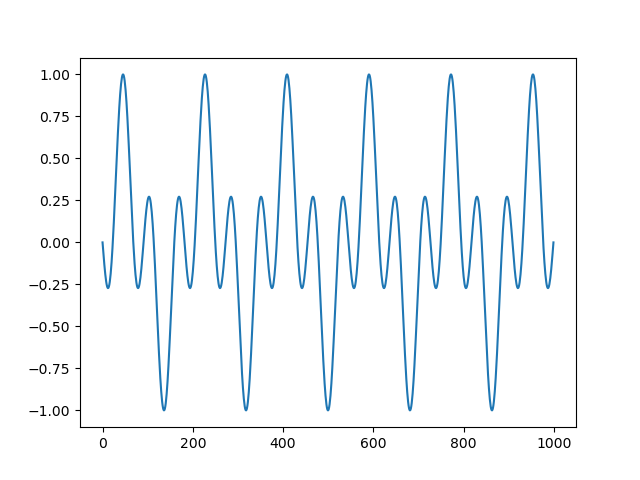

In [266]:
x = np.linspace(-np.pi, 10*np.pi, 1000)
plt.figure()
plt.plot(np.sin(x)*np.cos(2*x))
plt.show()

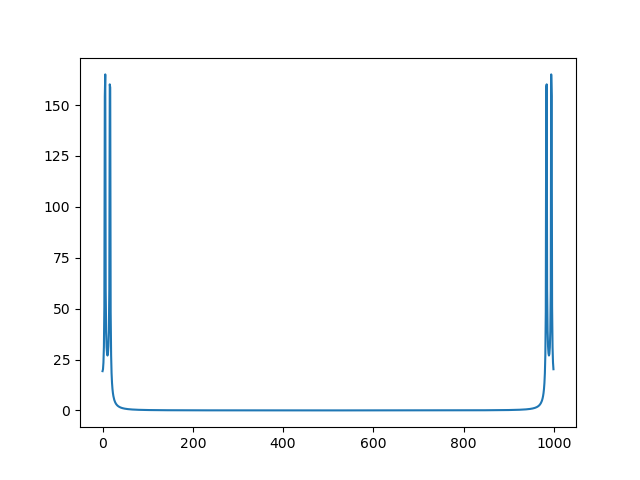

In [267]:
out = np.fft.fft(np.sin(x)*np.cos(2*x))
plt.figure()
plt.plot(np.abs(out))
plt.show()

The output of the FFT can be a little strange, the first half are for frequencies between `0` and `N/2` and the second half is between `-N/2` and `0`, we can shift the zero to the centre using `fftshift`

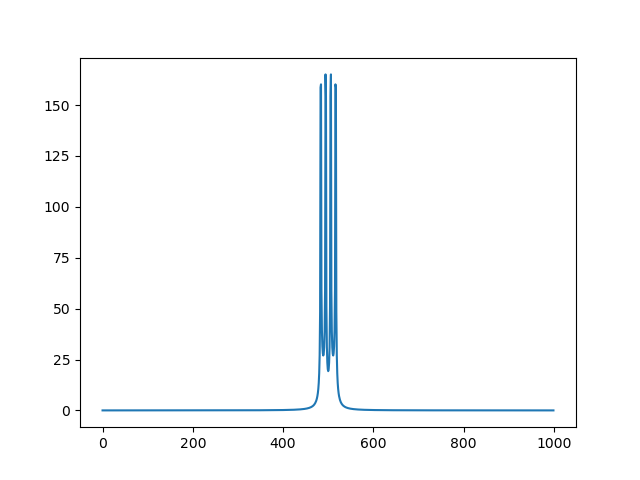

In [268]:
out = np.fft.fft(np.sin(x)*np.cos(2*x))
plt.figure()
plt.plot(np.absolute(np.fft.fftshift(out)))
plt.show()

We can also get the frequency coordinates using `fftfreq` (Remember to shift it as well!)

In [269]:
np.fft.fftfreq?

Signature: np.fft.fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1

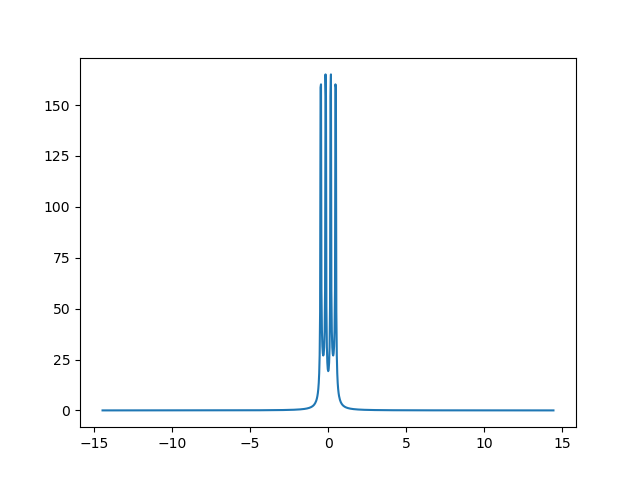

In [271]:
fx=np.fft.fftfreq(x.shape[0],d=x[1]-x[0])

fx = np.fft.fftshift(fx)
out = np.fft.fft(np.sin(x)*np.cos(2*x))

plt.figure()
plt.plot(fx, np.absolute(np.fft.fftshift(out)))
plt.show()

We can even do 2D FFTs. Lets try with our circle aperture function

interactive(children=(FloatSlider(value=4.0, description='r', max=10.0), Output()), _dom_classes=('widget-inte…

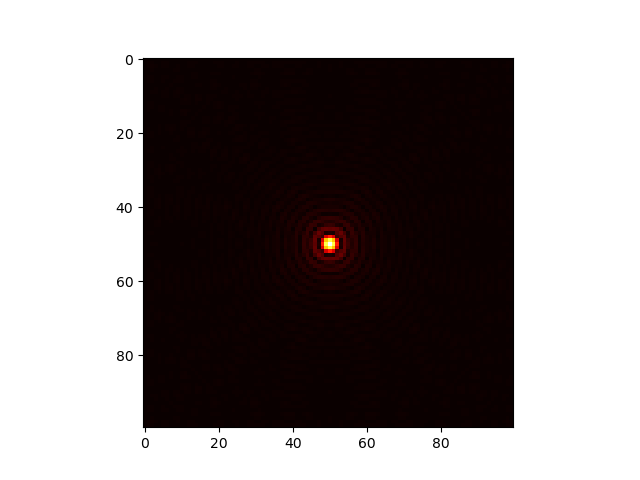

In [278]:
import matplotlib as mpl
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
r = 4.0

circle = create_circle(x, y, r)

fft_circle = np.fft.fftshift(np.fft.fft2(circle))

plt.figure()
im = plt.imshow(np.absolute(fft_circle), cmap='hot')

@interact(r=(0, 10,0.1))
def update(r=4):
    circle = create_circle(x, y, r)
    fft_circle = np.fft.fftshift(np.fft.fft2(circle))
    im.set_data(np.abs(fft_circle))
    


interactive(children=(FloatSlider(value=2.0, description='w', max=10.0), IntSlider(value=2, description='h', m…

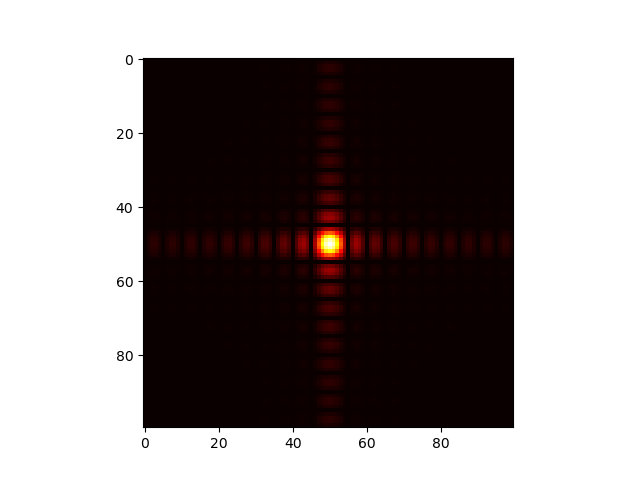

In [280]:
import matplotlib as mpl
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
w = 2.0
h = 2.0

rectangle = create_rectangle(x, y, w, h)

fft_rect = np.fft.fftshift(np.fft.fft2(rectangle))

plt.figure()
im = plt.imshow(np.absolute(fft_rect), cmap='hot')

@interact(w=(0, 10,0.1), height=(0, 10, 0.1))
def update(w=2, h=2):
    rectangle = create_rectangle(x, y, w, h)
    fft_rect = np.fft.fftshift(np.fft.fft2(rectangle))
    im.set_data(np.abs(fft_rect))